## Data Source

As for the first part of OSEMN methodology, a relevant dataset is needed in order to proceed into the next step. We decided to obtain our dataset directly from Kaggle. Our Heart Attack Analysis & Prediction dataset can be retrieved from here: (https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

In [ ]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("heart.csv")
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
print("\nNumber of rows: %d \nNumber of columns: %d" % (df.shape[0], df.shape[1]))
print("Column names: ", list(df.columns))


Number of rows: 303 
Number of columns: 14
Column names:  ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [ ]:


df.describe().T



,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
# obtain the pairwise correlation for all variables
cor_matrix = df.corr().abs()
display(cor_matrix)
# check if any pair of variables is highly correlated 
display(cor_matrix[(cor_matrix.iloc[:,:] >= 0.75) | (cor_matrix.iloc[:,:] <= -0.75)])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,0.098447,0.068653,0.279351,0.213678,0.121308,0.116211,0.398522,0.096801,0.210013,0.168814,0.276326,0.068001,0.225439
sex,0.098447,1.000000,0.049353,0.056769,0.197912,0.045032,0.058196,0.044020,0.141664,0.096093,0.030711,0.118261,0.210041,0.280937
cp,0.068653,0.049353,1.000000,0.047608,0.076904,0.094444,0.044421,0.295762,0.394280,0.149230,0.119717,0.181053,0.161736,0.433798
trtbps,0.279351,0.056769,0.047608,1.000000,0.123174,0.177531,0.114103,0.046698,0.067616,0.193216,0.121475,0.101389,0.062210,0.144931
chol,0.213678,0.197912,0.076904,0.123174,1.000000,0.013294,0.151040,0.009940,0.067023,0.053952,0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,0.084189,0.008567,0.025665,0.005747,0.059894,0.137979,0.032019,0.028046
restecg,0.116211,0.058196,0.044421,0.114103,0.151040,0.084189,1.000000,0.044123,0.070733,0.058770,0.093045,0.072042,0.011981,0.137230
thalachh,0.398522,0.044020,0.295762,0.046698,0.009940,0.008567,0.044123,1.000000,0.378812,0.344187,0.386784,0.213177,0.096439,0.421741
exng,0.096801,0.141664,0.394280,0.067616,0.067023,0.025665,0.070733,0.378812,1.000000,0.288223,0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,0.149230,0.193216,0.053952,0.005747,0.058770,0.344187,0.288223,1.000000,0.577537,0.222682,0.210244,0.430696


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trtbps,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalachh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
exng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


No redundancy found

In [ ]:
# Creating function for outlier check
def outlier_check(var):
    sns.displot(data = df, x = var)
    print('Variable: ', var) 
    print('Minimum value: ', df[var].min())
    print('1st percentile: ', df[var].quantile(0.01))
    print('99th percentile: ', df[var].quantile(0.99))
    print('Maximum value: ', df[var].max())

# Outlier treatment, sets minimum value to 1st percentile or maximum value to 99th percentile.
def outlier_treatment(var, min_treat, max_treat):
    min = df[var].quantile(0.01)
    max = df[var].quantile(0.99)
    if min_treat == 1:
        df.loc[df[var] <= min, var] =  min
    if max_treat == 1:
        df.loc[df[var] >= max, var] =  max

Variable:  age
Minimum value:  29
1st percentile:  35.0
99th percentile:  71.0
Maximum value:  77


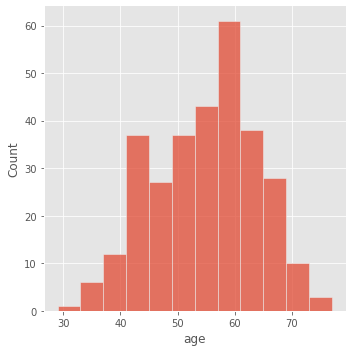

In [ ]:
outlier_check('age')
outlier_treatment('age', min_treat = 1, max_treat = 0)

Variable:  age
Minimum value:  35
1st percentile:  35.0
99th percentile:  71.0
Maximum value:  77


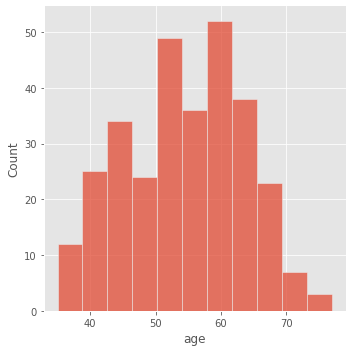

In [ ]:
outlier_check('age')

Variable:  trtbps
Minimum value:  94
1st percentile:  100.0
99th percentile:  180.0
Maximum value:  200


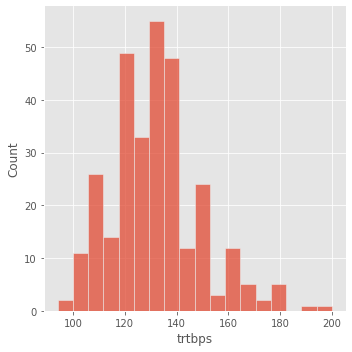

In [ ]:
outlier_check('trtbps')
outlier_treatment('trtbps', min_treat = 1, max_treat = 1)

Variable:  trtbps
Minimum value:  100
1st percentile:  100.0
99th percentile:  180.0
Maximum value:  180


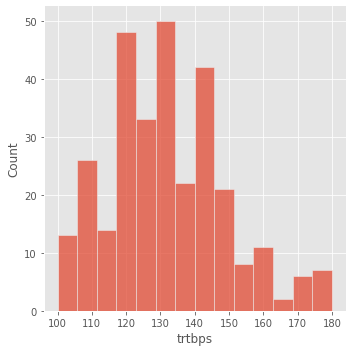

In [ ]:
outlier_check('trtbps')

Variable:  chol
Minimum value:  126
1st percentile:  149.0
99th percentile:  406.74000000000024
Maximum value:  564


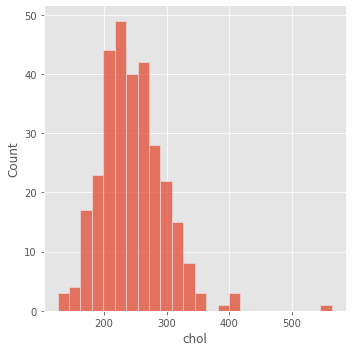

In [ ]:
outlier_check('chol')
outlier_treatment('chol', min_treat = 0, max_treat = 1)

Variable:  chol
Minimum value:  126.0
1st percentile:  149.0
99th percentile:  406.4852000000005
Maximum value:  406.74000000000024


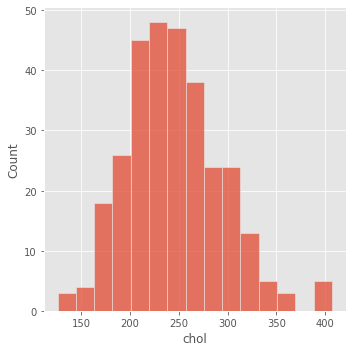

In [ ]:
outlier_check('chol')

Variable:  thalachh
Minimum value:  71
1st percentile:  95.02
99th percentile:  191.96000000000004
Maximum value:  202


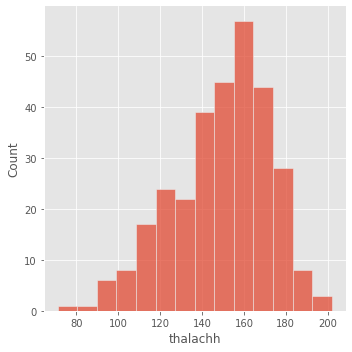

In [ ]:
outlier_check('thalachh')
outlier_treatment('thalachh', min_treat = 1, max_treat = 0)

Variable:  thalachh
Minimum value:  95.02
1st percentile:  95.0396
99th percentile:  191.96000000000004
Maximum value:  202.0


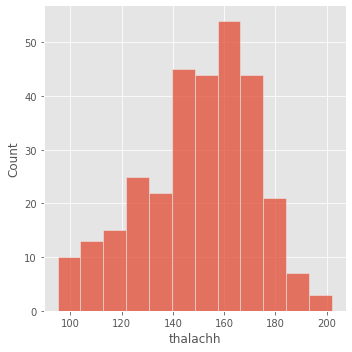

In [ ]:
outlier_check('thalachh')

Variable:  oldpeak
Minimum value:  0.0
1st percentile:  0.0
99th percentile:  4.2
Maximum value:  6.2


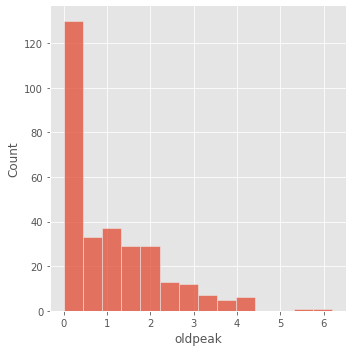

In [ ]:
outlier_check('oldpeak')
outlier_treatment('oldpeak', min_treat = 0, max_treat = 1)

Variable:  oldpeak
Minimum value:  0.0
1st percentile:  0.0
99th percentile:  4.2
Maximum value:  4.2


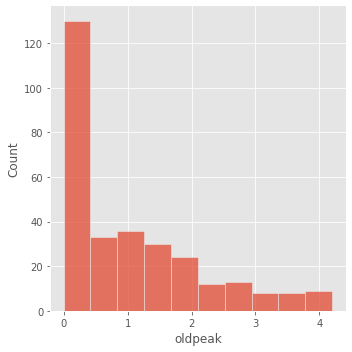

In [ ]:
outlier_check('oldpeak')

   Count  Percentage
1    165       54.46
0    138       45.54


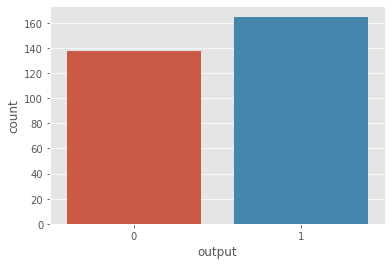

In [ ]:
sns.countplot(df['output'])
print(pd.concat( [df['output'].value_counts(),
                  df['output'].value_counts(normalize=True).mul(100).round(2)],
                 axis = 1,
                 keys = ('Count', 'Percentage')))

## EDA

In [ ]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
cat_cols = ['sex','exng','caa','cp','fbs','re','slp','thall']
con_cols = ["age","pressure","cholesterol","rate","oldpeak"]
target_col = ["output"]

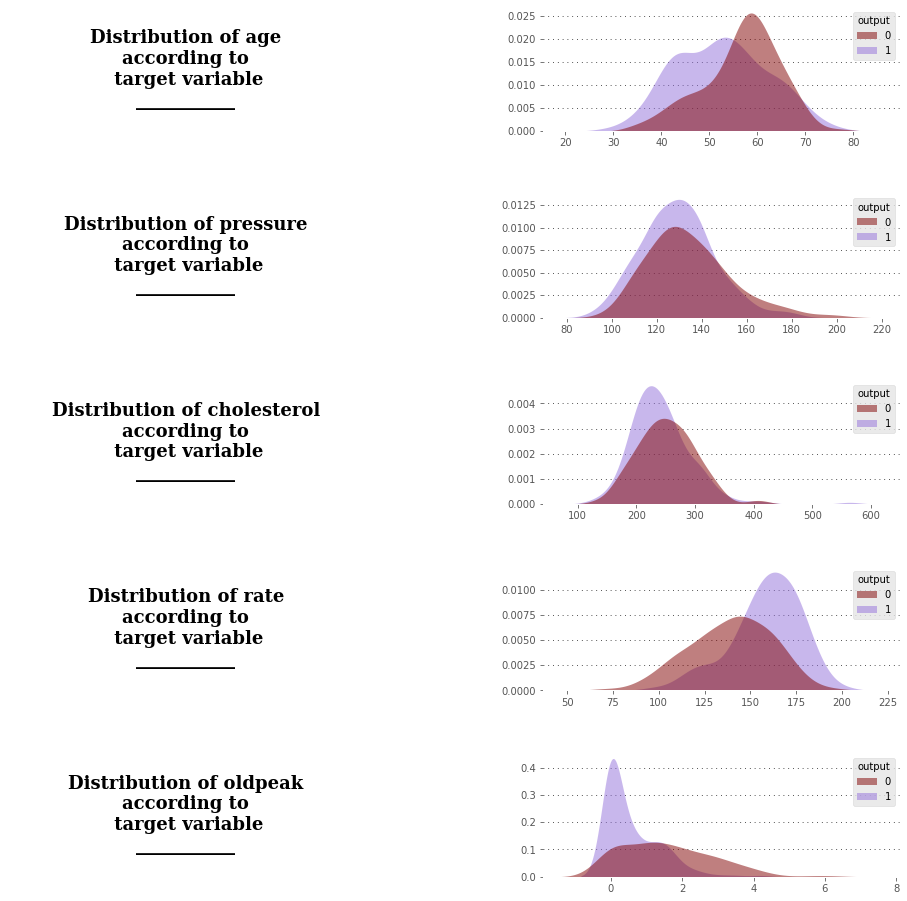

In [ ]:
fig = plt.figure(figsize=(16,16))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#FFFFFF"
color_palette = ["#5833ff","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")
# TrTbps title pressure
ax2.text(0.5,0.5,"Distribution of pressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")
# Chol title
ax4.text(0.5,0.5,"Distribution of cholesterol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")
# Thalachh title
ax6.text(0.5,0.5,"Distribution of rate\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# rate 
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

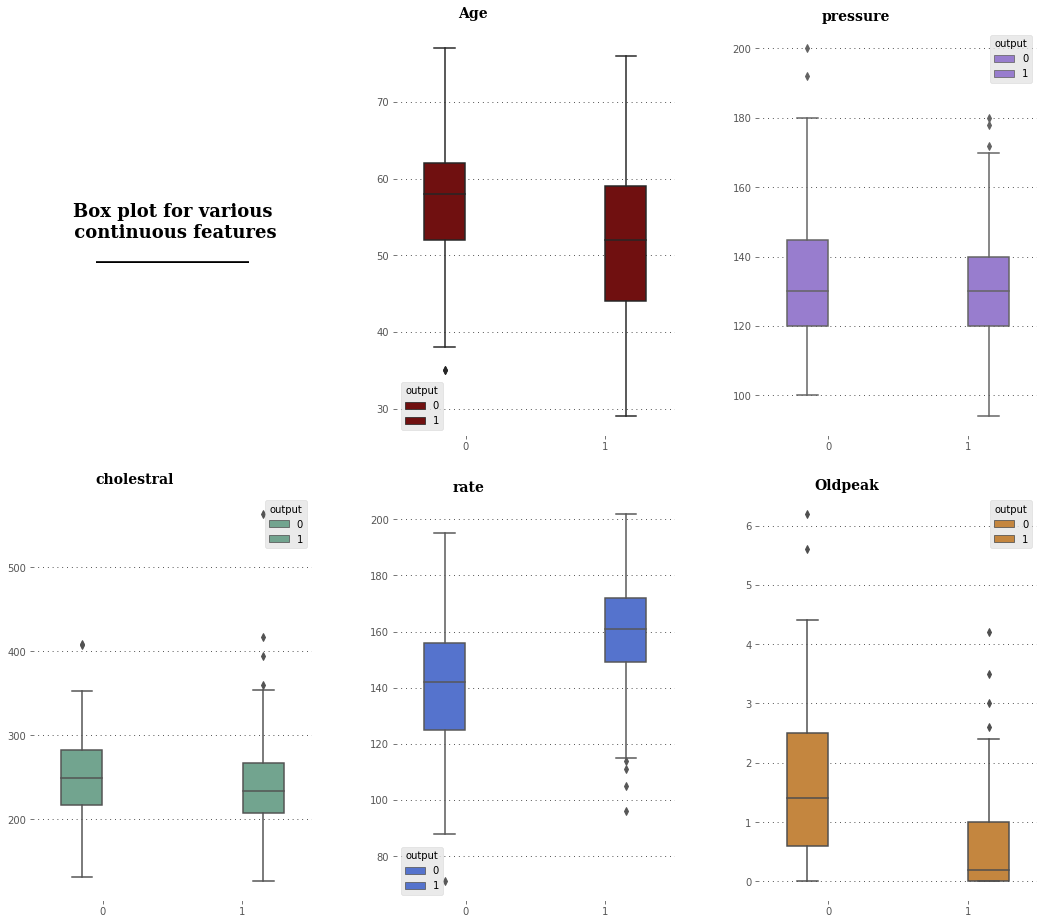

In [ ]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#FFFFFF"
color_palette = ["#800000","#9370DB","#6aac90","#4169E1","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax1,x='output',y='age',data=df,hue=df['output'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'pressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax2,x='output',y='trtbps',data=df,hue=df['output'],palette=["#9370DB"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'cholestral', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax3,x='output',y='chol',data=df,hue=df['output'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# rate  
ax4.text(-0.09, 210, 'rate', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax4,x='output',y='thalachh',data=df,hue=df['output'],palette=["#4169E1"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")
# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5,x='output',y='oldpeak',data=df,hue=df['output'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

There are certain outliers in all the continuous features.  

It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age, it is evident that this isn't the case.   

In the Trtbps and Chol plots, the distribution of people with less chance of heart attack and more chance is similar.

According to the distribution plot of thalachh, people with higher maximum heart rate achieved have higher chances of heart attack.   

According to the distribution plot of oldpeak, people with lower pevious peak achieved have higher chances of heart attack. 


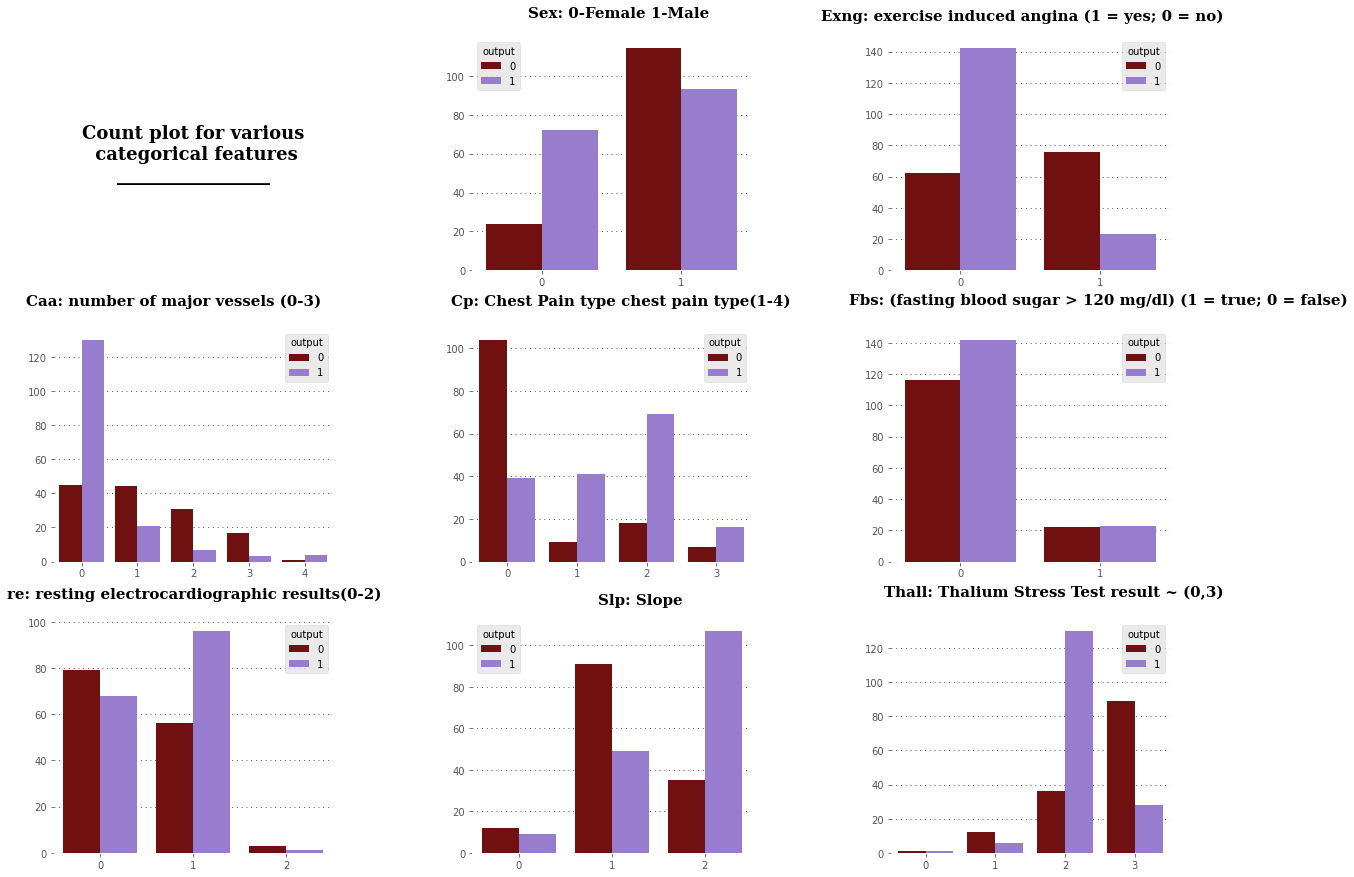

In [ ]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#FFFFFF"
color_palette = ["#800000","#9370DB","#6aac90","#4169E1","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(-0.1, 130, 'Sex: 0-Female 1-Male', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',hue='output',fill= True,palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(-1, 160, 'Exng: exercise induced angina (1 = yes; 0 = no)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',hue='output',fill= True,palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(-1.0, 150, 'Caa: number of major vessels (0-3)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',hue='output',fill= True,palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count,
ax4.text(-0.8, 120, 'Cp: Chest Pain type chest pain type(1-4)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',hue='output',fill= True,palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(-0.8, 165, 'Fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',hue='output',fill= True,palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(-1.0, 110, 're: resting electrocardiographic results(0-2)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',hue='output',fill= True,palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 120, 'Slp: Slope', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',hue='output',fill= True,palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(-0.6, 150, 'Thall: Thalium Stress Test result ~ (0,3)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',hue='output',fill= True,palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

People with sex = 1 (Male) have higher chance of heart attack.  

People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.

People with 0 major vessels, that is with caa = 0 have high chance of heart attack. 

The cp plot tells about the following, people with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.  

The fbs plot indicates that people with fasting blood sugar < 120 mg/dl are more likely to get heart attack.

The Slp graph shows that when slope=2, the chance of heart disease is higher

People with thall = 2 have much higher chance of 
heart attack.  


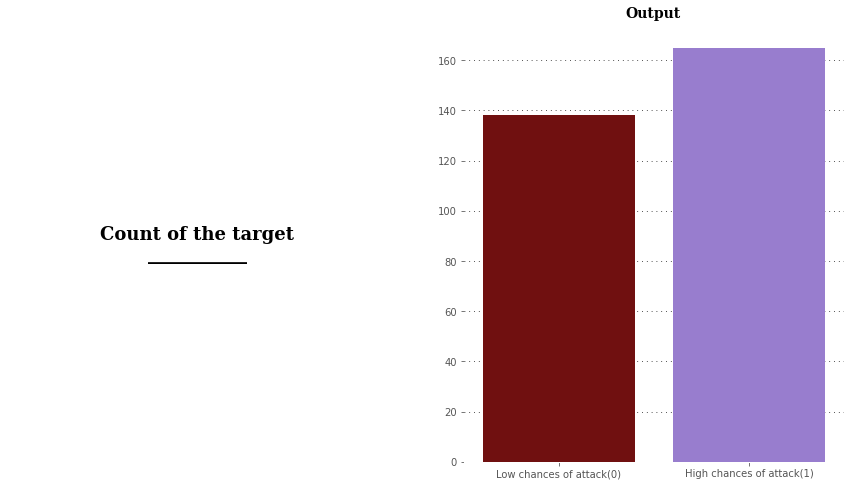

In [ ]:
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.2, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#FFFFFF"
color_palette = ["#800000","#9370DB","#6aac90","#4169E1","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

In [ ]:
df_corr()

NameError: ignored

NameError: ignored

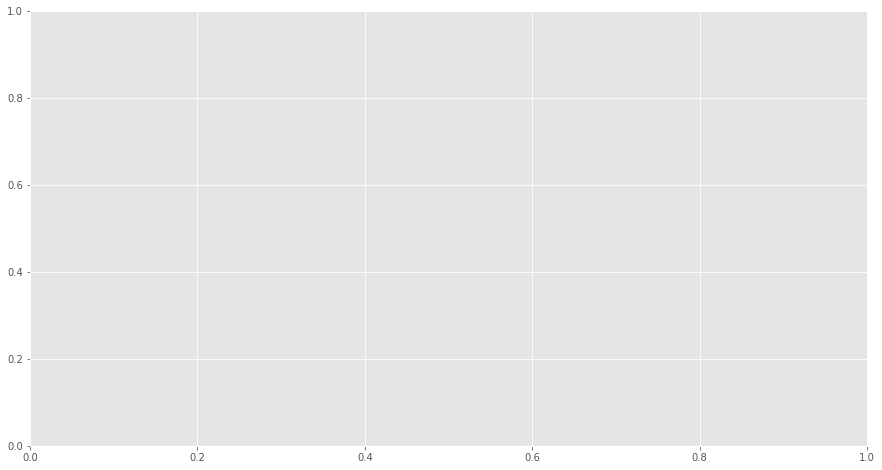

In [ ]:
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

#color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

There is no apparent linear correlation between continuous variable according to the heatmap.

<Figure size 864x864 with 0 Axes>

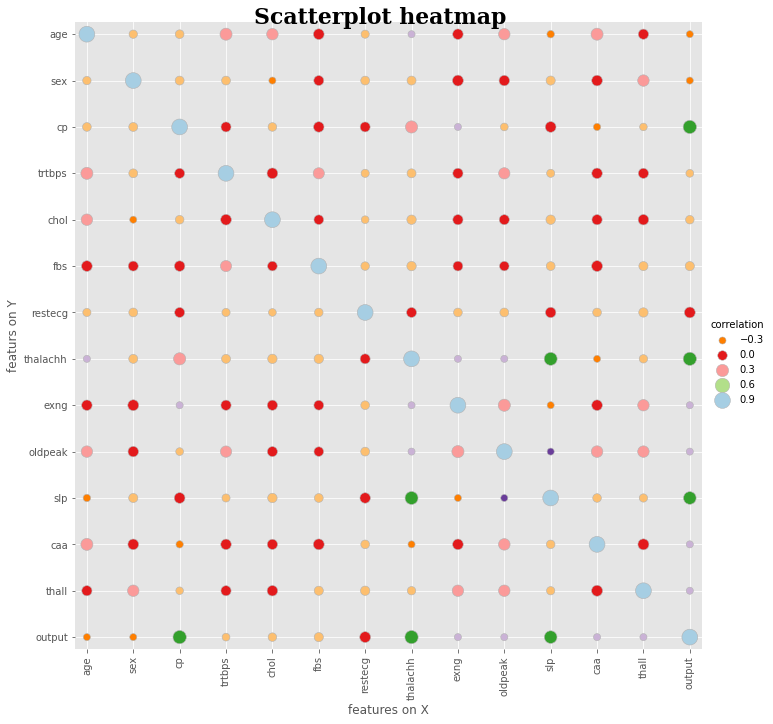

In [ ]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="Paired_r", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

The scatterplot heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp. 

## Machine Learning Model
In this project, we are going to perform correlation analysis on data features to predict whether a person is vulnerable to heart attack.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier



from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score


* We defines two lists of columns, "cat_cols" and "con_cols", which represent the categorical and continuous columns in the dataset respectively.

* Use the "pd.get_dummies" function to one-hot encode the categorical columns in the "df1" dataframe, using the "cat_cols" list as the input. The "drop_first" parameter is set to True, which drops the first level of each categorical variable to avoid multi-collinearity.

* We also use the "RobustScaler" to scale continuous variables in the dataset which is important for the better performance of the model.

* And as for the test and train data. We sets the test with size of 0.2.

In [ ]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")

The first 5 rows of X are


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [ ]:
result = []

## We selected nine models for training, visualized and compared the results

SVC

#Support Vector Machines


In [ ]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

result.append(accuracy_score(y_test, y_pred))
# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()
# extract feature importance
#importance = rfe.ranking_

plt.hist(importance,edgecolor='w')

NameError: ignored

Logistic Regression

The test accuracy score of Logistric Regression is  0.9016393442622951


(array([2., 0., 2., 3., 2., 2., 4., 5., 0., 2.]),
 array([-1.85766047, -1.53834801, -1.21903555, -0.8997231 , -0.58041064,
        -0.26109818,  0.05821428,  0.37752674,  0.6968392 ,  1.01615166,
         1.33546411]),
 <a list of 10 Patch objects>)

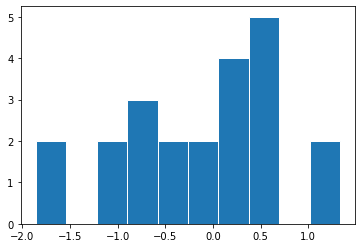

In [ ]:
# Logistic Regression
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)
result.append(accuracy_score(y_test, y_pred))

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

# extract feature importance
importance = logreg.coef_[0]
plt.hist(importance,edgecolor='w')

Decision Tree

The test accuracy score of Decision Tree is  0.7868852459016393


(array([10.,  6.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0.        , 0.02559866, 0.05119731, 0.07679597, 0.10239462,
        0.12799328, 0.15359193, 0.17919059, 0.20478924, 0.2303879 ,
        0.25598655]),
 <a list of 10 Patch objects>)

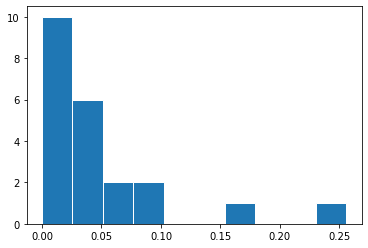

In [ ]:
# Decision Tree
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))
result.append(accuracy_score(y_test, y_pred))

# extract feature importance
importance = dt.feature_importances_
plt.hist(importance,edgecolor='w')

RandomForest¶

The test accuracy score of Random Forest is  0.819672131147541


(array([4., 4., 3., 2., 1., 0., 1., 5., 0., 2.]),
 array([0.00077109, 0.01186176, 0.02295243, 0.0340431 , 0.04513377,
        0.05622444, 0.06731511, 0.07840578, 0.08949645, 0.10058712,
        0.11167779]),
 <a list of 10 Patch objects>)

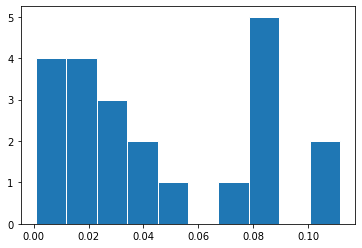

In [ ]:
# RandomForest
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))
result.append(accuracy_score(y_test, y_pred))
feat_importances = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=True)
plt.hist(feat_importances,edgecolor='w')

Gradient Boosting Classifie

The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934


(array([6., 3., 3., 4., 1., 1., 2., 0., 1., 1.]),
 array([0.        , 0.01464706, 0.02929412, 0.04394117, 0.05858823,
        0.07323529, 0.08788235, 0.10252941, 0.11717647, 0.13182352,
        0.14647058]),
 <a list of 10 Patch objects>)

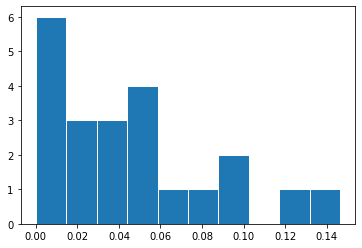

In [ ]:
# Gradient Boosting Classifier - without tuning
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))
result.append(accuracy_score(y_test, y_pred))
feat_importances = pd.Series(gbt.feature_importances_,index=X_train.columns).sort_values(ascending=True)
plt.hist(feat_importances,edgecolor='w')

KNeighbors

The test accuracy score of KNeighbors is  0.8688524590163934


(array([7., 3., 2., 2., 2., 1., 0., 2., 1., 2.]),
 array([0.        , 0.01366511, 0.02733021, 0.04099532, 0.05466042,
        0.06832553, 0.08199064, 0.09565574, 0.10932085, 0.12298596,
        0.13665106]),
 <a list of 10 Patch objects>)

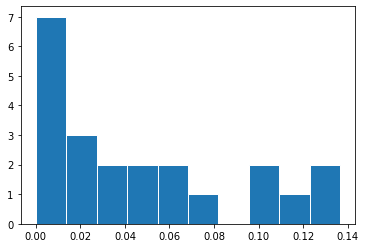

In [ ]:
kc=KNeighborsClassifier()
# fitting the model
kc.fit(X_train, y_train)

# calculating the predictions
y_pred = kc.predict(X_test)

# printing the test accuracy
print("The test accuracy score of KNeighbors is ", accuracy_score(y_test, y_pred))
result.append(accuracy_score(y_test, y_pred))

# perform feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=3)
X_new = selector.fit_transform(X_train, y_train)

# extract feature importance
importance = selector.scores_
plt.hist(importance,edgecolor='w')

XGB

The test accuracy score of XGB is  0.819672131147541


(array([16.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.04140234, 0.08280469, 0.12420703, 0.16560937,
        0.20701171, 0.24841405, 0.2898164 , 0.33121875, 0.3726211 ,
        0.41402343], dtype=float32),
 <a list of 10 Patch objects>)

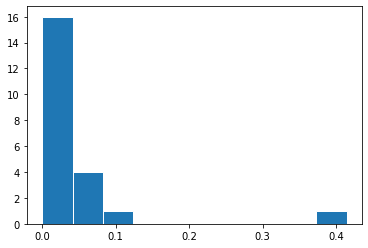

In [ ]:
xgb=XGBClassifier()
# fitting the model
xgb.fit(X_train, y_train)

# calculating the predictions
y_pred = xgb.predict(X_test)

# printing the test accuracy
print("The test accuracy score of XGB is ", accuracy_score(y_test, y_pred))
result.append(accuracy_score(y_test, y_pred))
feat_importances = pd.Series(xgb.feature_importances_,index=X_train.columns).sort_values(ascending=True)
plt.hist(feat_importances,edgecolor='w')

GaussianNB

The test accuracy score of GaussianNB is  0.639344262295082


(array([1., 2., 2., 5., 3., 1., 5., 1., 1., 1.]),
 array([-0.02459016, -0.01704918, -0.0095082 , -0.00196721,  0.00557377,
         0.01311475,  0.02065574,  0.02819672,  0.0357377 ,  0.04327869,
         0.05081967]),
 <a list of 10 Patch objects>)

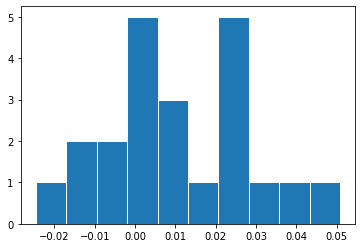

In [ ]:
g=GaussianNB()
# fitting the model
g.fit(X_train, y_train)

# calculating the predictions
y_pred = g.predict(X_test)

# printing the test accuracy
print("The test accuracy score of GaussianNB is ", accuracy_score(y_test, y_pred))
result.append(accuracy_score(y_test, y_pred))


# calculate permutation importance
result = permutation_importance(g, X_test, y_test, n_repeats=10, 
                                random_state=0, scoring='accuracy')

# extract feature importance
importance = result.importances_mean
plt.hist(importance,edgecolor='w')

BernoulliNB

The test accuracy score of BernoulliNB is  0.8524590163934426


(array([1., 0., 2., 0., 1., 9., 2., 4., 1., 2.]),
 array([-1.63934426e-02, -1.31147541e-02, -9.83606557e-03, -6.55737705e-03,
        -3.27868852e-03, -3.81639165e-17,  3.27868852e-03,  6.55737705e-03,
         9.83606557e-03,  1.31147541e-02,  1.63934426e-02]),
 <a list of 10 Patch objects>)

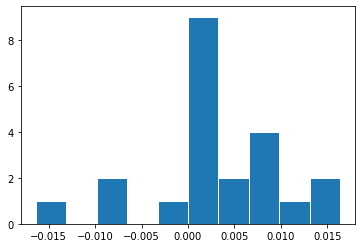

In [ ]:
b=BernoulliNB()
# fitting the model
b.fit(X_train, y_train)

# calculating the predictions
y_pred = b.predict(X_test)

# printing the test accuracy
print("The test accuracy score of BernoulliNB is ", accuracy_score(y_test, y_pred))
result.append(accuracy_score(y_test, y_pred))


result = permutation_importance(b, X_test, y_test, n_repeats=10, 
                                random_state=0, scoring='accuracy')

# extract feature importance
importance = result.importances_mean
plt.hist(importance,edgecolor='w')

In [ ]:
result

[0.8688524590163934,
 0.9016393442622951,
 0.7868852459016393,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.819672131147541,
 0.639344262295082,
 0.8524590163934426]

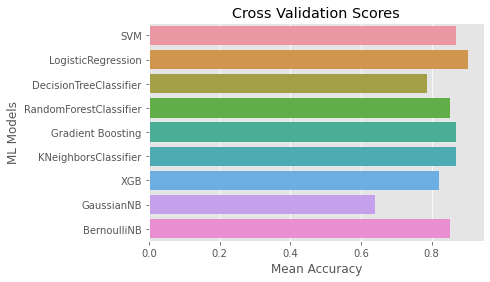

In [ ]:
results = pd.DataFrame({"Cross Validation Means":result, "ML Models":["SVM","LogisticRegression","DecisionTreeClassifier", "RandomForestClassifier",
                     "Gradient Boosting","KNeighborsClassifier","XGB","GaussianNB","BernoulliNB"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

clf = SVC(kernel='linear', C=1, random_state=103)
logreg = LogisticRegression()
rf = RandomForestClassifier()
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=103)
kc=KNeighborsClassifier()
xgb=XGBClassifier()
b=BernoulliNB()

classifiers = [('SVC', clf), ('LogisticRegression', logreg), ('RandomForest', rf), ('GradientBoosting', gbt), ('KNeighbors', kc), ('XGB', xgb), ('BernoulliNB', b)]

ensemble = VotingClassifier(estimators = classifiers)
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

print("The test accuracy score of the ensemble is ", accuracy_score(y_test, y_pred))


The test accuracy score of the ensemble is  0.9180327868852459


# Data Interpretation

# **Object 1**
To better analysis the relationship between heart disease causative factors and heart attacks.

There are two types of variables, **Continuous and Discrete**,  we use specific plots to analyze the relationship.

For the continuous variables : sex, exng, caa, cp, fbs, re, slp, thall. 

We use **KdePlot and Boxplot** to analyze the relationship between heart disease causative factors and heart attacks.



Text(0, 0.5, '')

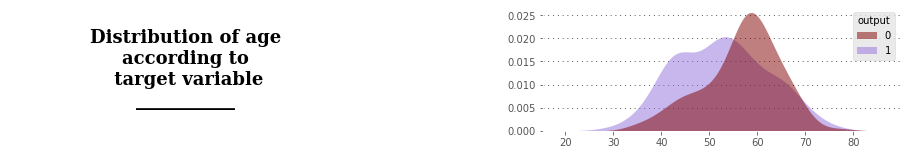

In [ ]:
# KdePlot example of Age and heart attacks. It represents the data using a 
# continuous probability density curve, directly shows the distribution of data.

fig = plt.figure(figsize=(16,16))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


background_color = "#FFFFFF"
color_palette = ["#5833ff","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

Text(0, 0.5, '')

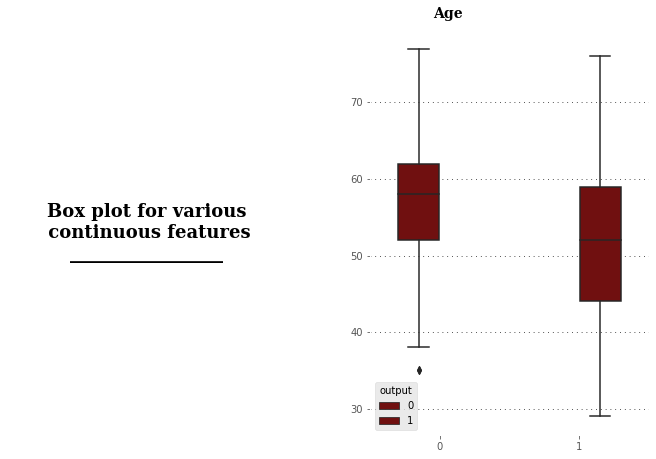

In [ ]:
# Box plot of Age and attacks. It displays the distribution of data based on a five number summary.
# It can tell you about your outliers and what their values are

fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#FFFFFF"
color_palette = ["#800000","#9370DB","#6aac90","#4169E1","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax1,x='output',y='age',data=df,hue=df['output'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

For the discrete Various : sex, exng, caa, cp, fbs, re, slp, thall.

We use **Countplot** to analyze the relationship between heart disease causative factors and heart attacks.

Text(0, 0.5, '')

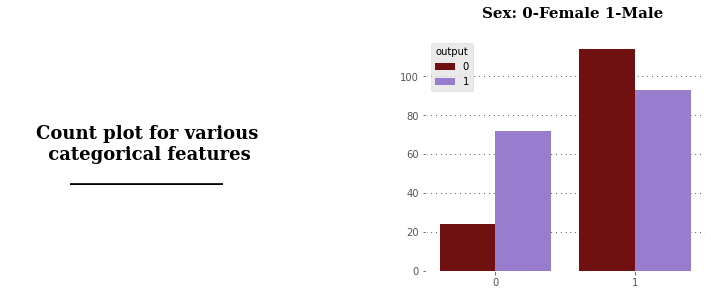

In [ ]:
# Countplot example of Sex and attacks. 
# Show the counts of observations in each categorical bin using bars.

fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#FFFFFF"
color_palette = ["#800000","#9370DB","#6aac90","#4169E1","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.text(-0.1, 130, 'Sex: 0-Female 1-Male', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',hue='output',fill= True,palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

Then we use **heatplot** to analysis the correlation index between heart disease causative factors and heart attacks. 

In [ ]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="Paired_r", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

But it shows that there is no direct relationship between causative factors and heart attacks.

# **Object 2**

To find a solution to build a highly accurate heart disease prediction model

We employ the following models to predict heart disease.

Then contrast the accuracy scores of each model. 
1. SVM
2. LogisticRegression
3. DecisionTreeClassifier
4. RandomForestClassifier
5. Gradient Boosting
6. KNeighborsClassifier
7. XGB
8. GaussianNB
9. BernoulliNB

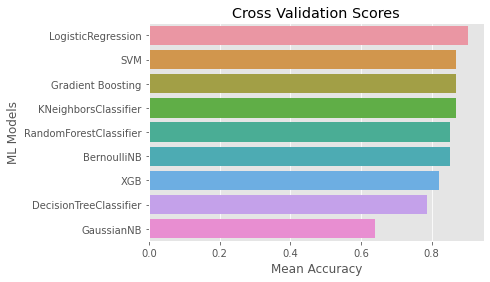

In [ ]:
sorted_results = results.sort_values("Cross Validation Means", ascending = False)
g = sns.barplot("Cross Validation Means", "ML Models", data = sorted_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

Finally we find that the **Logistic Regression** model performs best in heart attack prediction.

## Web app deploy

In [ ]:
import pickle as pkl
pkl.dump(model_here,open("final_model.p","wb"))

In [ ]:
%%writefile heartattack-predict-app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#Load the saved model
model=pkl.load(open("final_model.p","rb"))





st.set_page_config(page_title="Heart Attack Predictor",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")



def preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal ):   
 
    
  #  Pre-processing user input   
    if sex=="male":
        sex=1 
    else: 
        sex=0
    
    
    if cp=="Typical angina":
        cp=0
    elif cp=="Atypical angina":
        cp=1
    elif cp=="Non-anginal pain":
        cp=2
    elif cp=="Asymptomatic":
        cp=2
    
    if exang=="Yes":
        exang=1
    elif exang=="No":
        exang=0
 
    if fbs=="Yes":
        fbs=1
    elif fbs=="No":
        fbs=0
 
    if slope=="Upsloping: better heart rate with exercise(uncommon)":
        slope=0
    elif slope=="Flatsloping: minimal change(typical healthy heart)":
          slope=1
    elif slope=="Downsloping: signs of unhealthy heart":
        slope=2  
 
    if thal=="fixed defect: used to be defect but ok now":
        thal=6
    elif thal=="reversable defect: no proper blood movement when excercising":
        thal=7
    elif thal=="normal":
        thal=2.31

    if restecg=="Nothing to note":
        restecg=0
    elif restecg=="ST-T Wave abnormality":
        restecg=1
    elif restecg=="Possible or definite left ventricular hypertrophy":
        restecg=2


    user_input=[age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

    

       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Heart Attack Predictor App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by Data Alliance ')
      
# following lines create boxes in which user can enter data required to make prediction
age=st.selectbox ("Age",range(1,121,1))
sex = st.radio("Select Gender: ", ('male', 'female'))
cp = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
trestbps=st.selectbox('Resting Blood Sugar',range(1,500,1))
restecg=st.selectbox('Resting Electrocardiographic Results',("Nothing to note","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"))
chol=st.selectbox('Serum Cholestoral in mg/dl',range(1,1000,1))
fbs=st.radio("Fasting Blood Sugar higher than 120 mg/dl", ['Yes','No'])
thalach=st.selectbox('Maximum Heart Rate Achieved',range(1,300,1))
exang=st.selectbox('Exercise Induced Angina',["Yes","No"])
oldpeak=st.number_input('Oldpeak')
slope = st.selectbox('Heart Rate Slope',("Upsloping: better heart rate with excercise(uncommon)","Flatsloping: minimal change(typical healthy heart)","Downsloping: signs of unhealthy heart"))
ca=st.selectbox('Number of Major Vessels Colored by Flourosopy',range(0,5,1))
thal=st.selectbox('Thalium Stress Result',range(1,8,1))



#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred=preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal)




if st.button("Predict"):    
  if pred[0] == 0:
    st.error('Warning! You have high risk of getting a heart attack!')
    
  else:
    st.success('You have low risk of getting a heart attack!')
    
   



st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of getting a heart attack.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy heart")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
  st.header("Thank you for rating the app!")
  st.info("Caution: This is just a prediction and not doctoral advice. Kindly see a doctor if you feel the symptoms persist.") 

In [ ]:
!nohup streamlit run healthy-heart-app.py --server.port 8765 &
url = ngrok.connect(port='8765')
url

# **Conclusion**

Heart disease causes a significant mortality rate around the world, and it has become a health threat for many people.

We are committed to building a heart disease prediction platform to help heart disease stakeholders gain a deeper understanding of the causative factors of heart disease and to predict possible heart attacks in conjunction with their own factors.

Our heart attack prediction system accomplish two objective. 
We discovered the relationship between heart disease causative factors and heart attacks. Found that there is no tensity relationship between factors and attacks. Thus, we deducted that several factors contribute to a heart attack.

Then we took several causative factors into account, employed 9 models to find a solution to build a highly accurate heart disease prediction model. We eventually found that logistic regression achieved the best prediction performance.

Heart attack prediction model is suitable for all types of medical institutions to assist doctors in predicting heart disease and helping patients to better manage their heart disease. It can help doctors to better monitor their conditions and save patients' lives through prognosis, further improving the doctor-patient relationship and promoting the development of medical and healthcare in society.

